In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import psutil
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# -----------------------------------
# ✅ 1. Setting Up Environment
# -----------------------------------
print("✅ Checking system specifications...")

# Print RAM & CPU usage
print(f"Total RAM: {round(psutil.virtual_memory().total / (1024**3), 2)} GB")
print(f"Available RAM: {round(psutil.virtual_memory().available / (1024**3), 2)} GB")
print(f"CPU Usage: {psutil.cpu_percent()}%")

# Install required Python libraries (run in terminal if not installed)
# pip install pandas numpy matplotlib seaborn scikit-learn

# ---------------------------------
# ✅ 2. Loading Dataset
# -----------------------------------

print("\n✅ Loading dataset...")
file_path = "C:/Users/priya/Downloads/PAC_AEbyVote.csv"
df = pd.read_csv(file_path)
print("Dataset loaded successfully! Shape:", df.shape)

# Display first few rows
print("\n🔍 First few rows of the dataset:")
print(df.head())

✅ Checking system specifications...
Total RAM: 15.55 GB
Available RAM: 5.69 GB
CPU Usage: 6.6%

✅ Loading dataset...
Dataset loaded successfully! Shape: (7692, 7)

🔍 First few rows of the dataset:
        fy_ef  org_id                                 org_name  \
0  FY 2011-12     1.0  Department of Agriculture and Agri-Food   
1  FY 2011-12     1.0  Department of Agriculture and Agri-Food   
2  FY 2011-12     1.0  Department of Agriculture and Agri-Food   
3  FY 2011-12     1.0  Department of Agriculture and Agri-Food   
4  FY 2011-12     1.0  Department of Agriculture and Agri-Food   

  voted_or_statutory                                   description  \
0                  1                             Operating/Program   
1                 10                        Grants & Contributions   
2                  5                                       Capital   
3                  S  Canadian Cattlemen's Association Legacy Fund   
4                  S    Canadian Pari-Mutuel Agency Revo

In [5]:
# -----------------------------------
# ✅ 3. Initial Data Quality Check
# -----------------------------------
print("\n✅ Checking for missing values...")
print(df.isnull().sum())  # Check for missing data

print("\n✅ Checking for duplicate records...")
print(f"Duplicate rows found: {df.duplicated().sum()}")
# If duplicated found -> df.drop_duplicates()# -----------------------------------
# ✅ 3. Initial Data Quality Check
# -----------------------------------
print("\n✅ Checking for missing values...")
print(df.isnull().sum())  # Check for missing data

print("\n✅ Checking for duplicate records...")
print(f"Duplicate rows found: {df.duplicated().sum()}")
# If duplicated found -> df.drop_duplicates()


✅ Checking for missing values...
fy_ef                   0
org_id                  1
org_name                0
voted_or_statutory      0
description             0
authorities            35
expenditures          228
dtype: int64

✅ Checking for duplicate records...
Duplicate rows found: 0

✅ Checking for missing values...
fy_ef                   0
org_id                  1
org_name                0
voted_or_statutory      0
description             0
authorities            35
expenditures          228
dtype: int64

✅ Checking for duplicate records...
Duplicate rows found: 0


In [6]:
# -----------------------------------
# ✅ 4. Handling Missing Values
# -----------------------------------
# Create a copy of the original DataFrame to avoid SettingWithCopyWarning
raw_df = df.copy()

# Remove rows with negative values in 'authorities' and 'expenditures' and create a new independent DataFrame
df = df.loc[(df['authorities'] >= 0) & (df['expenditures'] >= 0)].copy()

print("\n✅ Handling missing values...")

# Use dictionary-based assignment to avoid future pandas warning
df.fillna({"authorities": df["authorities"].median(), 
           "expenditures": df["expenditures"].median(), 
           "org_id": -1}, inplace=True)

# Replace missing categorical values with 'Unknown'
df[['org_name', 'voted_or_statutory', 'description']] = df[['org_name', 'voted_or_statutory', 'description']].fillna("Unknown")

print("Missing values handled successfully.")



✅ Handling missing values...
Missing values handled successfully.


In [7]:
# -----------------------------------
# ✅ 5. Standardizing Column Names & Formatting
# -----------------------------------

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")  # Standardize column names
#df["fy_ef"] = pd.to_datetime(df["fy_ef"], errors="coerce")  # Convert fiscal year to datetime if applicable
len(df)

7211

In [8]:
# -----------------------------------
# ✅ 6. Exploratory Data Analysis (EDA)
# -----------------------------------
# Set the float format to show numbers in regular notation (without scientific notation)
pd.set_option('display.float_format', '{:.5f}'.format)
print("\n✅ Performing Exploratory Data Analysis...")

# Summary statistics
print("\n🔍 Summary Statistics:")
print(df.describe())


✅ Performing Exploratory Data Analysis...

🔍 Summary Statistics:
          org_id       authorities      expenditures
count 7211.00000        7211.00000        7211.00000
mean   167.47788   592590711.55930   554578213.79444
std     97.83224  3086645102.18338  3033745891.15736
min     -1.00000           0.00000           0.00000
25%    122.00000      486207.00000      231280.49000
50%    134.00000    12286516.00000     9546694.00000
75%    239.00000   128205871.00000   105759721.00000
max    561.00000 57444856822.00000 57444856822.00000


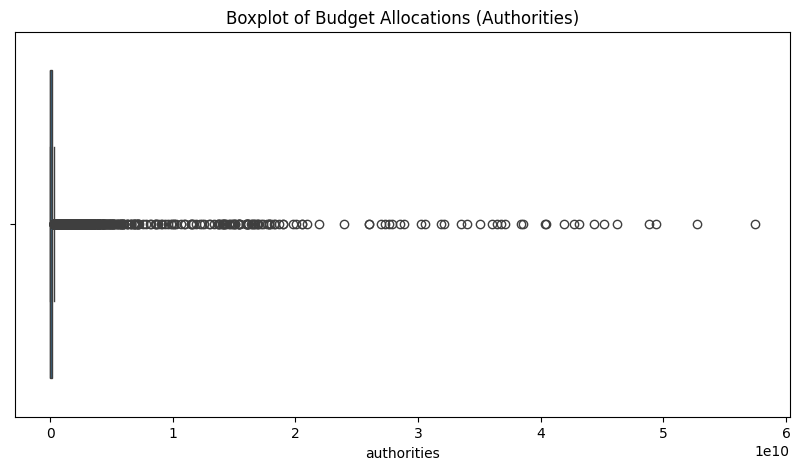

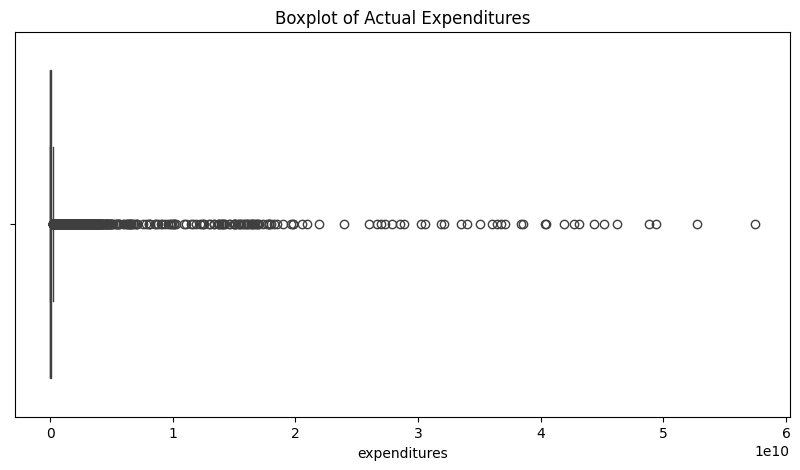

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['authorities'])
plt.title("Boxplot of Budget Allocations (Authorities)")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df['expenditures'])
plt.title("Boxplot of Actual Expenditures")
plt.show()

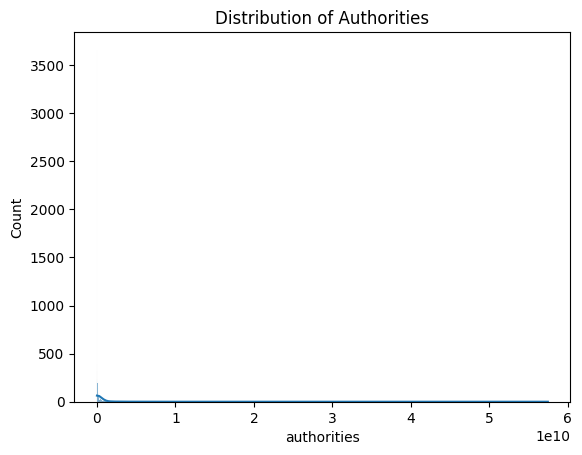

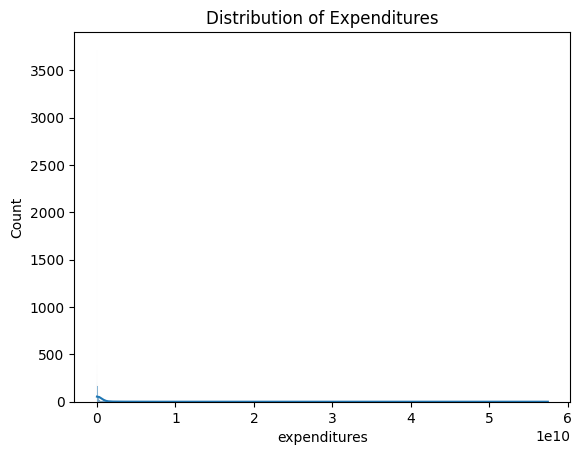

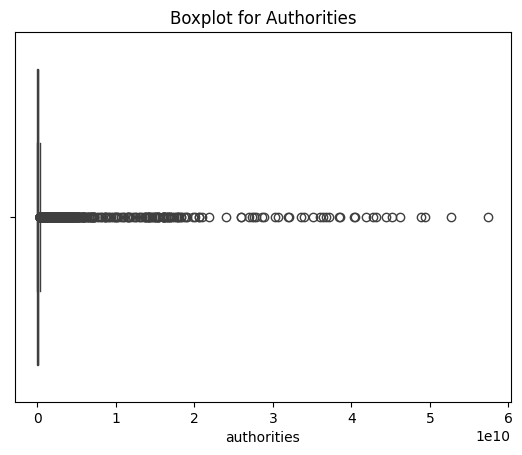

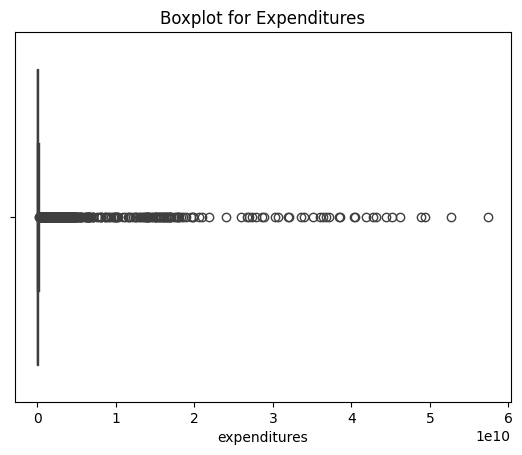

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram and boxplot for authorities and expenditures
sns.histplot(df['authorities'], kde=True)  # For distribution
plt.title('Distribution of Authorities')
plt.show()

sns.histplot(df['expenditures'], kde=True)  # For distribution
plt.title('Distribution of Expenditures')
plt.show()

sns.boxplot(x=df['authorities'])
plt.title('Boxplot for Authorities')
plt.show()

sns.boxplot(x=df['expenditures'])
plt.title('Boxplot for Expenditures')
plt.show()

In [11]:
#Check for Imbalanced Data
df.groupby('org_name')['authorities'].sum().sort_values(ascending=False)

org_name
Department of Finance                                            1343766587237.51001
Department of Employment and Social Development                   947848882375.95996
Department of National Defence                                    310359497811.37000
Department of Indigenous Services                                 162414742852.23001
Department of Crown-Indigenous Relations and Northern Affairs     128711322123.60001
                                                                         ...        
Registry of the Public Servants Disclosure Protection Tribunal         6677532.00000
Transportation Appeal Tribunal of Canada                               5919826.00000
Canadian Artists and Producers Professional Relations Tribunal         4412965.00000
Public Appointments Commission Secretariat                             2000107.00000
Freshwater Fish Marketing Corporation                                        1.00000
Name: authorities, Length: 152, dtype: float64

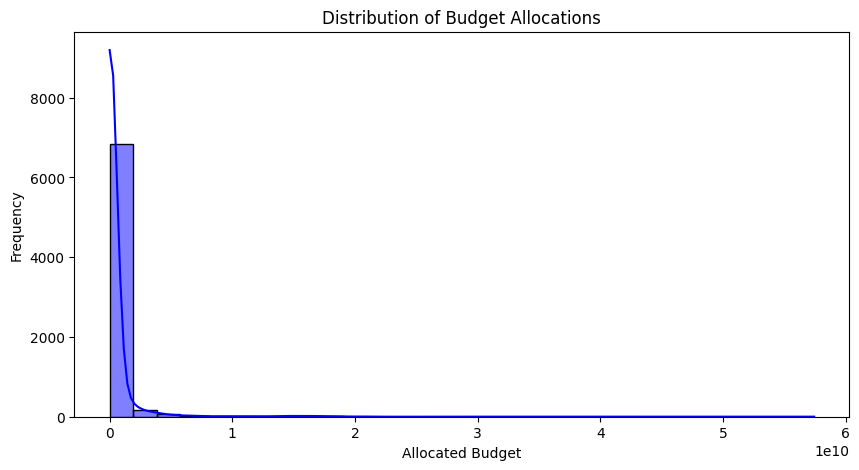

In [22]:
# Distribution of budget allocations
plt.figure(figsize=(10, 5))
sns.histplot(df["authorities"], bins=30, kde=True, color="blue")
plt.title("Distribution of Budget Allocations")
plt.xlabel("Allocated Budget")
plt.ylabel("Frequency")
plt.show()

In [24]:
# Skewness check
print("\n✅ Checking data skewness...")
print(df.skew(numeric_only=True))


✅ Checking data skewness...
org_id          0.98909
authorities    10.09325
expenditures   10.46377
dtype: float64


In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your dataframe

# Step 1: Extract fiscal year from 'fy_ef' column
df['fy_year'] = df['fy_ef'].apply(lambda x: int(x.split()[1].split('-')[0]))

# Step 2: Encode categorical columns
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = ['org_name', 'voted_or_statutory', 'description']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))  # Ensure they're treated as strings

# Step 3: Separate numeric and categorical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(exclude=[np.number]).columns

# Step 4: Handle missing values for numeric columns using SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Step 5: Define features (X) and target (y)
X = df.drop(columns=['expenditures', 'fy_ef'])  # Features, exclude target and fiscal year column
y = df['expenditures']  # Target


✅ Loading dataset...
   fy_year        authorities       expenditures
0     2019 321207816179.00000 303595160828.00000
1     2020 474885053301.00000 439638996703.00000
2     2021 417014888827.64001 376078864833.94000
3     2022 447722607533.00000 390902746052.00000
4     2023 509100606465.10999 474880957229.78003


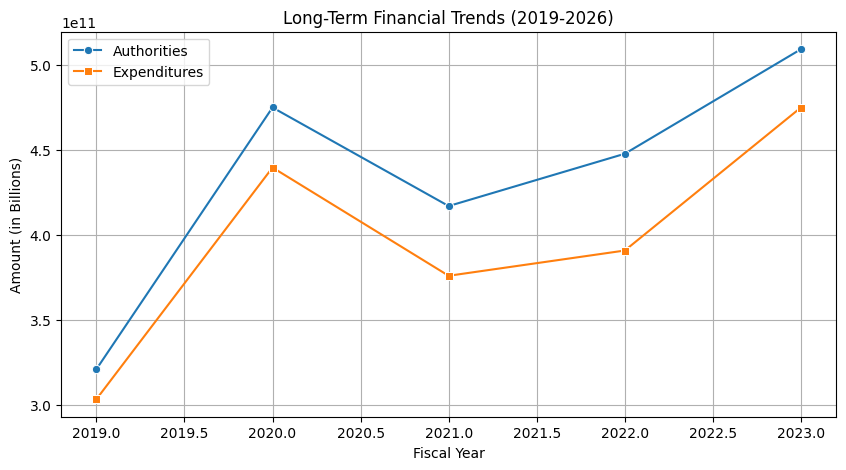

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n✅ Loading dataset...")
file_path = "C:/Users/priya/Downloads/PAC_AEbyVote.csv"
df = pd.read_csv(file_path)

# Extracting the fiscal year from the 'fy_ef' column
df['fy_year'] = df['fy_ef'].apply(lambda x: int(x.split()[1].split('-')[0]))

# Filtering the dataset for the required years (2019-20 to 2026-27)
df_trend = df[(df['fy_year'] >= 2019) & (df['fy_year'] <= 2026)]

# Grouping by fiscal year to get the total authorities and expenditures
trend_data = df_trend.groupby('fy_year')[['authorities', 'expenditures']].sum().reset_index()

# Display the extracted trend data
print(trend_data)

# Plotting the trend of authorities and expenditures over the years
plt.figure(figsize=(10, 5))
sns.lineplot(x=trend_data['fy_year'], y=trend_data['authorities'], marker='o', label='Authorities')
sns.lineplot(x=trend_data['fy_year'], y=trend_data['expenditures'], marker='s', label='Expenditures')

plt.xlabel('Fiscal Year')
plt.ylabel('Amount (in Billions)')
plt.title('Long-Term Financial Trends (2019-2026)')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\priya\AppData\Local\Temp\ipykernel_15760\2066125645.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


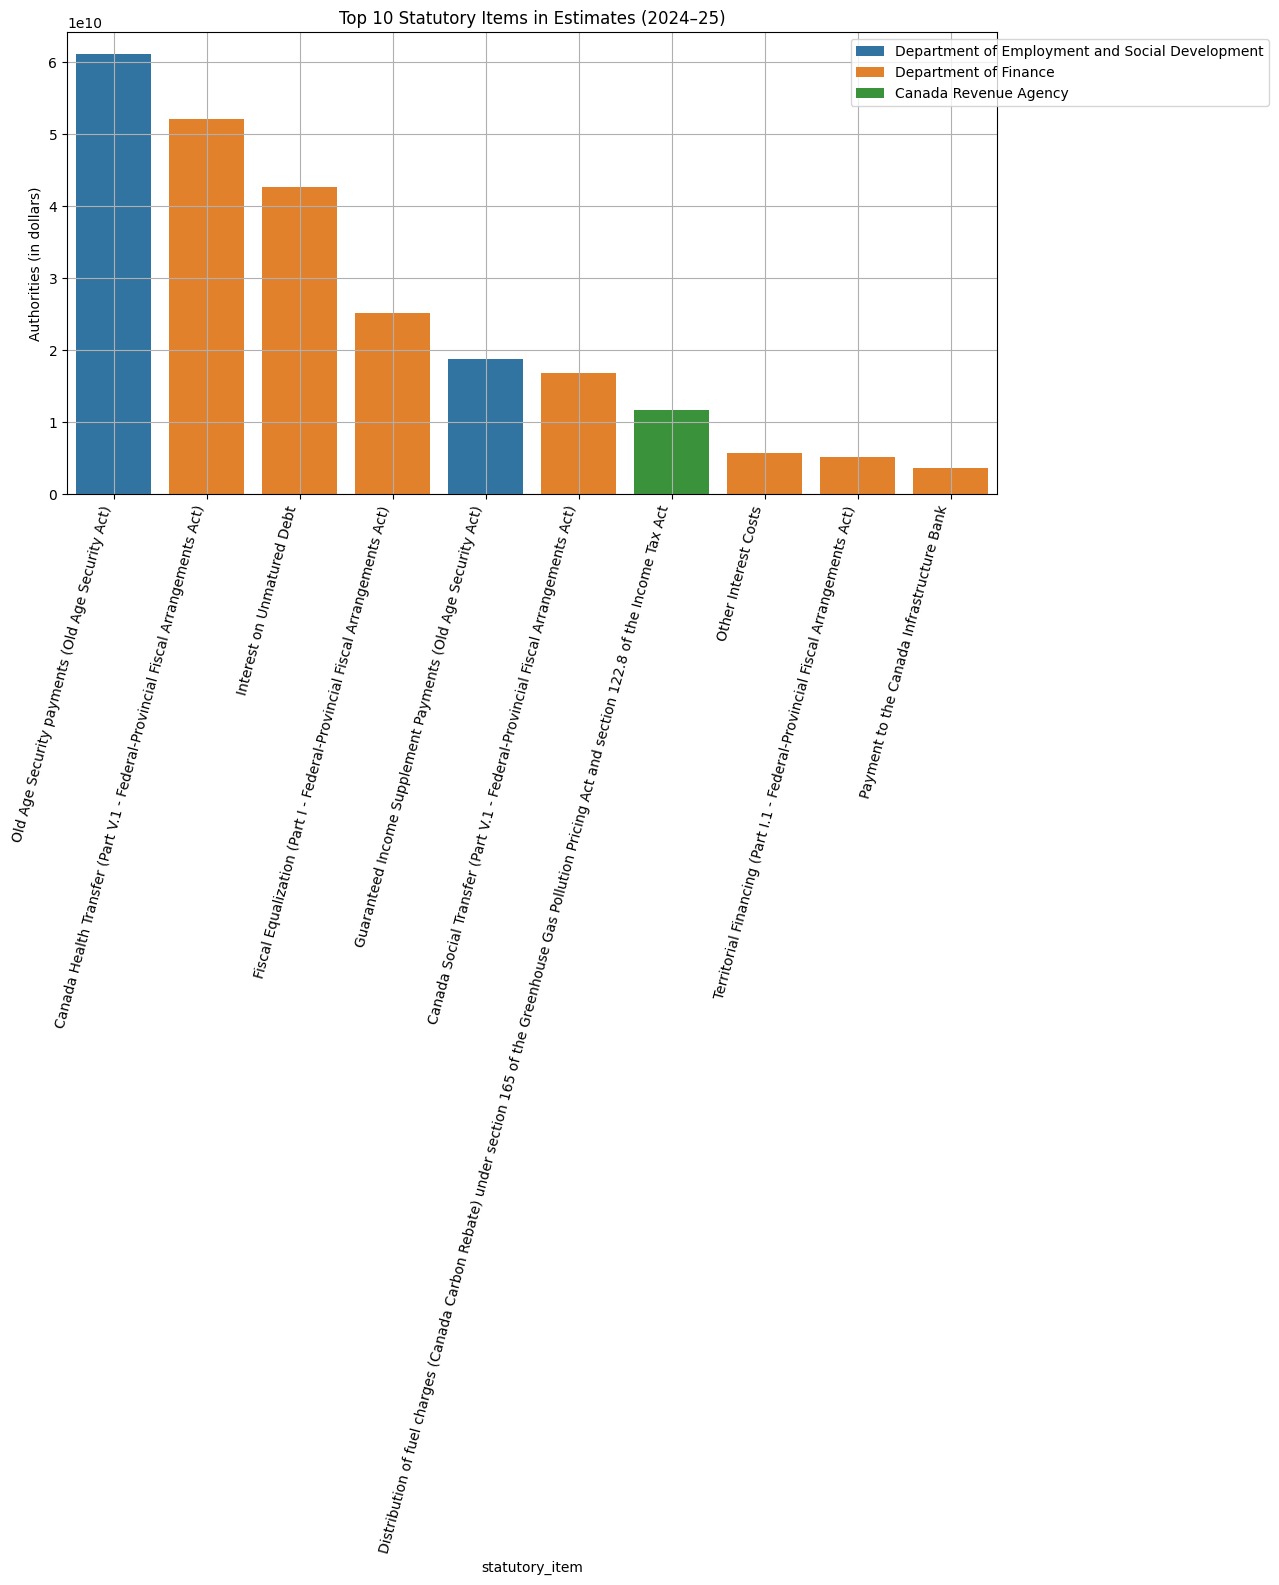

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the correct file path
file_statutory = "C:/Users/priya/OneDrive/Desktop/pjt/Statutory Forecasts.csv"

# Load the CSV file
df_statutory = pd.read_csv(file_statutory)

# Filter for FY 2024-25
df_statutory_2024 = df_statutory[df_statutory['fy_ef'] == "FY 2024-25"].copy()

# Group by organization and statutory item, summing the authorities
statutory_summary = df_statutory_2024.groupby(
    ['organization', 'statutory_item']
)['authorities'].sum().reset_index()

# Sort by authorities in descending order
statutory_summary_sorted = statutory_summary.sort_values(
    by='authorities', ascending=False
).reset_index(drop=True)

# Display the top 10 statutory items for visualization
top10_statutory = statutory_summary_sorted.head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10_statutory,
    y='authorities',
    x='statutory_item',
    hue='organization',
    dodge=False
)
plt.xticks(rotation=75, ha='right')
plt.ylabel("Authorities (in dollars)")
plt.title("Top 10 Statutory Items in Estimates (2024–25)")
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()


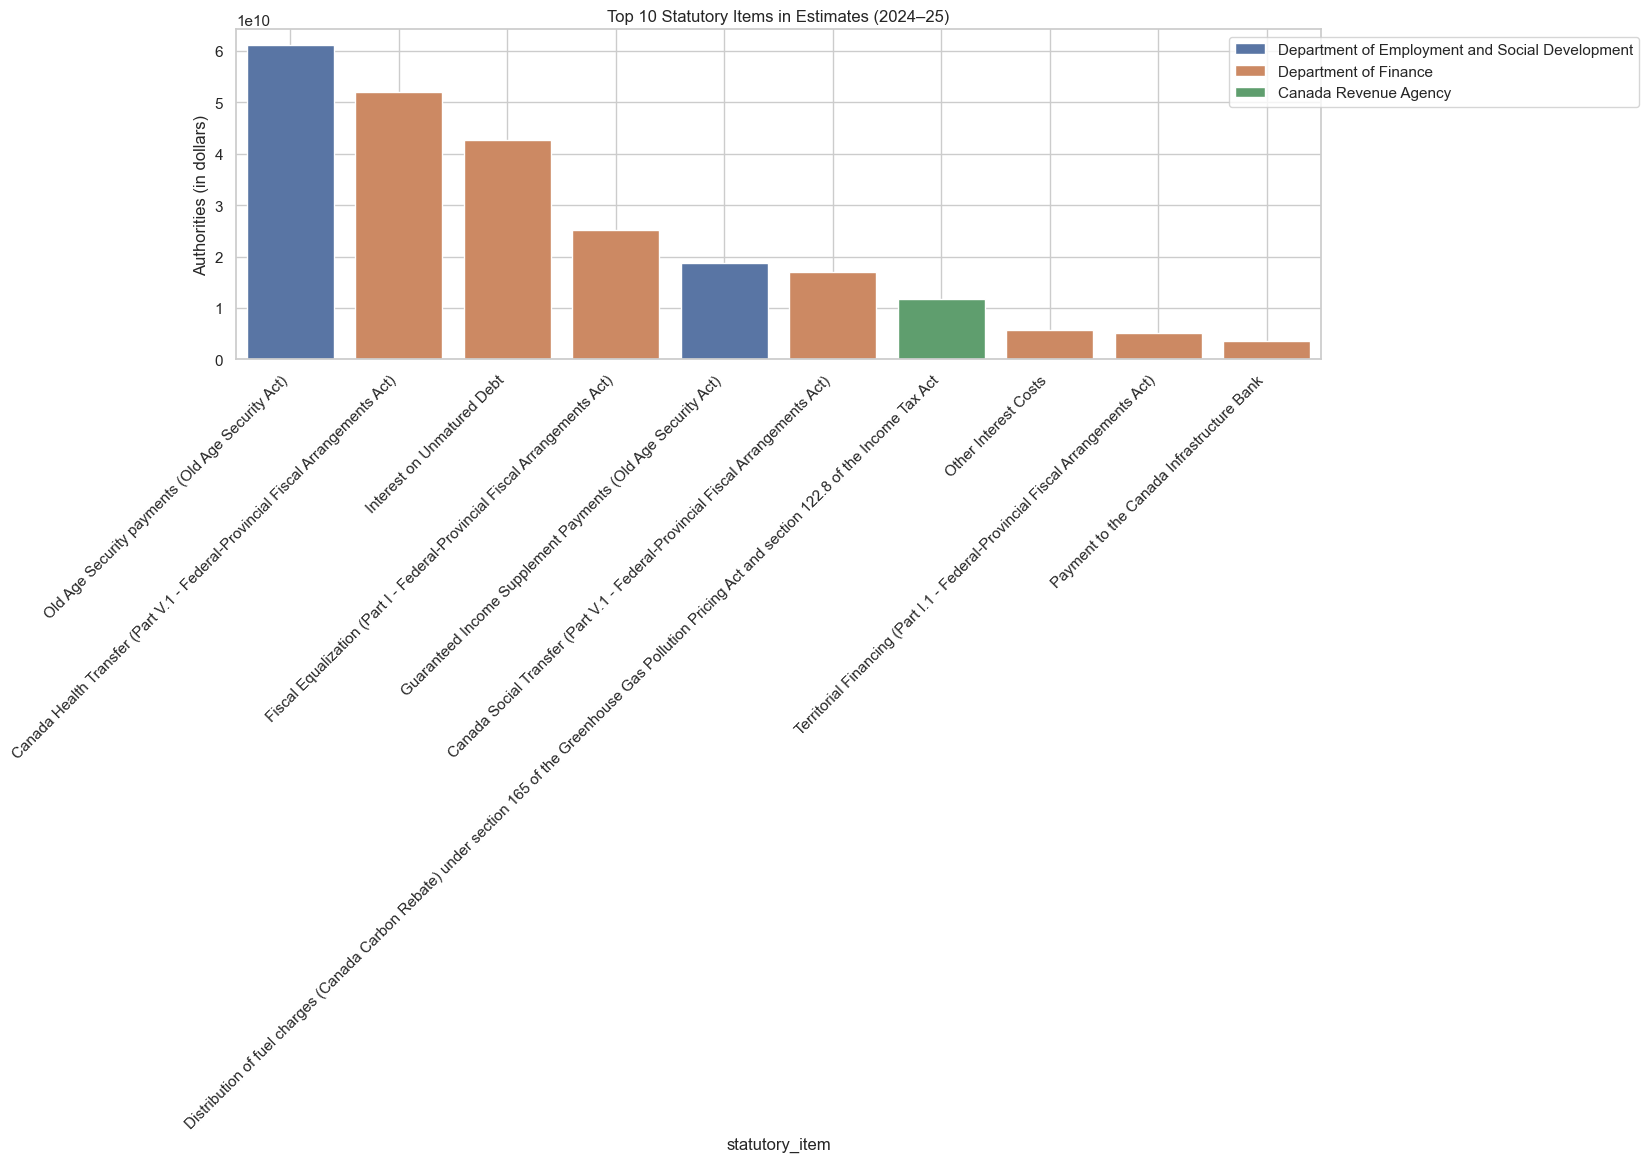

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Step 1: Load the CSV file
file_path = "C:/Users/priya/OneDrive/Desktop/pjt/Statutory Forecasts.csv"  # Update path if needed
df_statutory = pd.read_csv(file_path)

# Step 2: Filter for fiscal year 2024-25
df_statutory_2024 = df_statutory[df_statutory['fy_ef'] == "FY 2024-25"].copy()

# Step 3: Group by organization and statutory item
statutory_summary = df_statutory_2024.groupby(
    ['organization', 'statutory_item']
)['authorities'].sum().reset_index()

# Step 4: Sort by authorities in descending order
statutory_summary_sorted = statutory_summary.sort_values(
    by='authorities', ascending=False
).reset_index(drop=True)

# Step 5: Select top 10 statutory items
top10_statutory = statutory_summary_sorted.head(10)

# Step 6: Plotting
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top10_statutory,
    y='authorities',
    x='statutory_item',
    hue='organization',
    dodge=False
)

plt.xticks(rotation=45, ha='right')
plt.ylabel("Authorities (in dollars)")
plt.title("Top 10 Statutory Items in Estimates (2024–25)")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)

# Manual layout adjustment to fix margin warnings
plt.subplots_adjust(bottom=0.35, top=0.9)

# Show plot
plt.show()


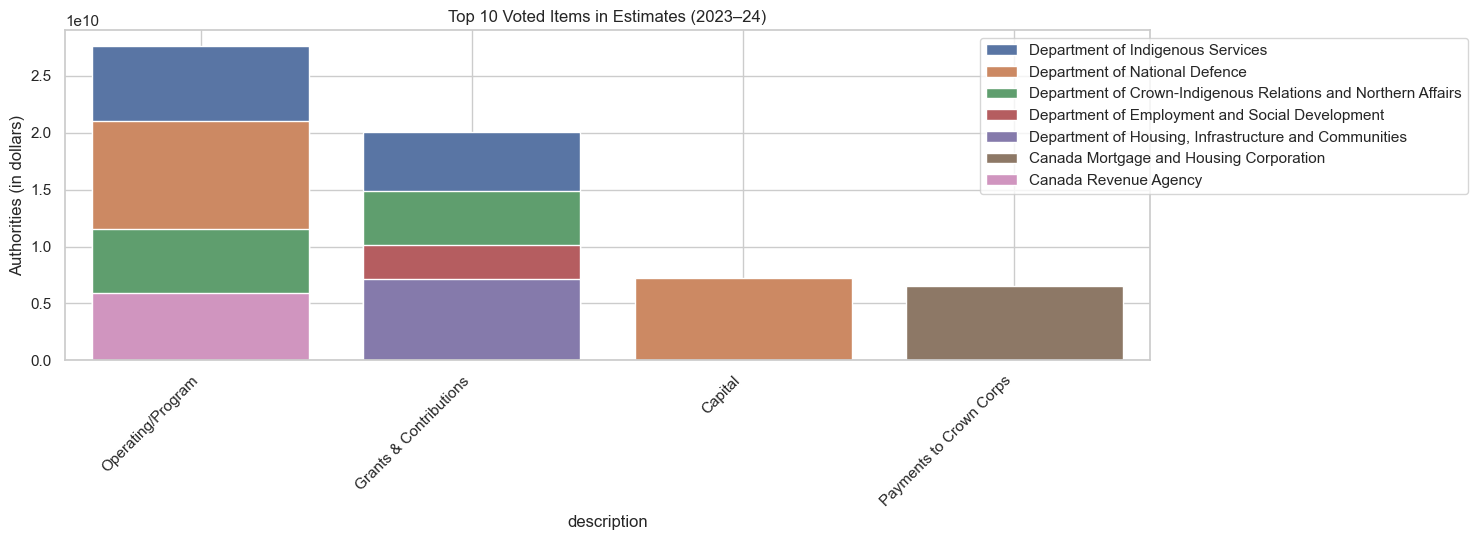

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the file
file_path = "C:/Users/priya/OneDrive/Desktop/pjt/Authorities and Expenditures by Vote.csv"
df_voted = pd.read_csv(file_path)

# Step 1: Filter for FY 2023–24
df_voted_2023 = df_voted[df_voted['fy_ef'] == "FY 2023-24"].copy()

# Step 2: Keep only voted items (exclude statutory 'S')
df_voted_2023 = df_voted_2023[df_voted_2023['voted_or_statutory'].str.upper() != 'S']

# Step 3: Group by organization and description, summing authorities and expenditures
voted_summary = df_voted_2023.groupby(
    ['org_name', 'description']
)[['authorities', 'expenditures']].sum().reset_index()

# Step 4: Sort by highest authorities
voted_summary_sorted = voted_summary.sort_values(by='authorities', ascending=False).reset_index(drop=True)

# Step 5: Select top 10 for visualization
top10_voted = voted_summary_sorted.head(10)

# Step 6: Plot
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.barplot(
    data=top10_voted,
    y='authorities',
    x='description',
    hue='org_name',
    dodge=False
)

plt.xticks(rotation=45, ha='right')
plt.ylabel("Authorities (in dollars)")
plt.title("Top 10 Voted Items in Estimates (2023–24)")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.subplots_adjust(bottom=0.35, top=0.9)
plt.show()
